# Assignment #1. Clustering

## Setup environment

In [225]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
%matplotlib inline

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

def show_result(x, labels, plot_name):
    plt.scatter(x[:, 0], x[:, 1], c=labels)
    plt.title(plot_name)
    plt.show()

## Randomly generated data

### Set parameters
`n_samples`    -- total number of points equally divided among clusters
`centers`      -- the number of centers to generate
`random_state` -- determines random number generation for dataset creation
`iterations`   -- how many iterations we are going to make while determining optimal clusters number (only for K-Means)

In [226]:
n_samples = 100
centers = 10
random_state = 420
iterations = centers * 2

x, y = make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)

### K-Means
Let us iterate each clusters number in [2, iterations) and calculate criteria for K-Means model.
Then we will save criteria to the array and use elbow method to determine optimal clusters number.

In [227]:
criteria_arr = []
for k in range(2, iterations):
    kmeans_model = KMeans(n_clusters=k, random_state=random_state)
    kmeans_model.fit(x)

    criteria = kmeans_model.inertia_
    criteria_arr.append(criteria)

Text(0.5, 1.0, 'Elbow point')

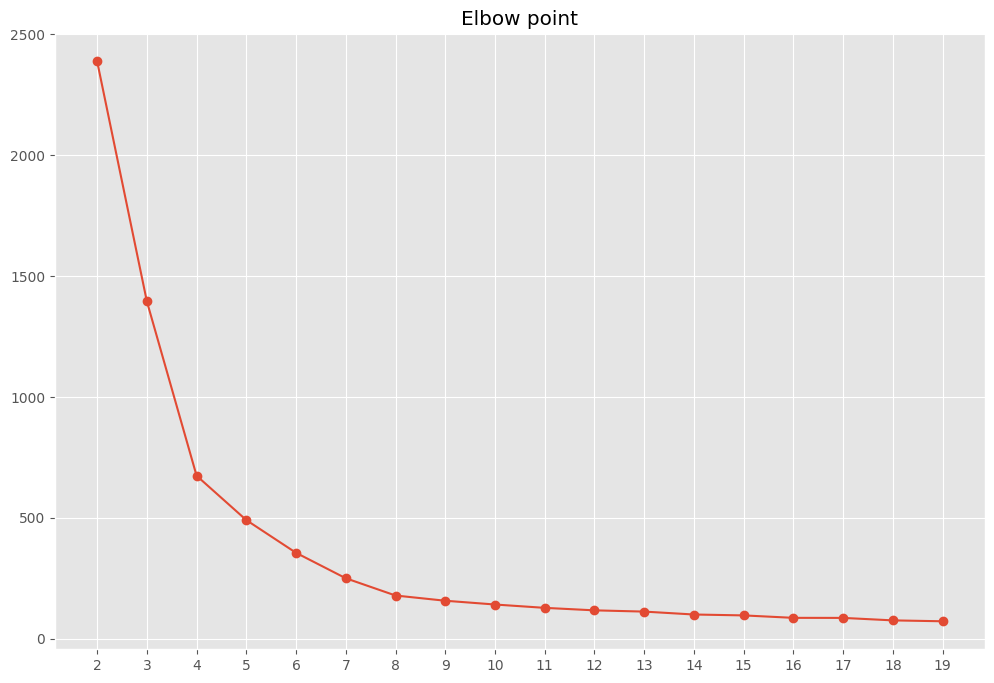

In [228]:
plt.plot(range(2, iterations), criteria_arr, marker="o")
plt.xticks([i for i in range(2, iterations)])
plt.title("Elbow point")

As we can see on the plot above, the optimal clusters number is 8.
After fitting model on 8 clusters, we can see the plot with coloured segmented blobs.

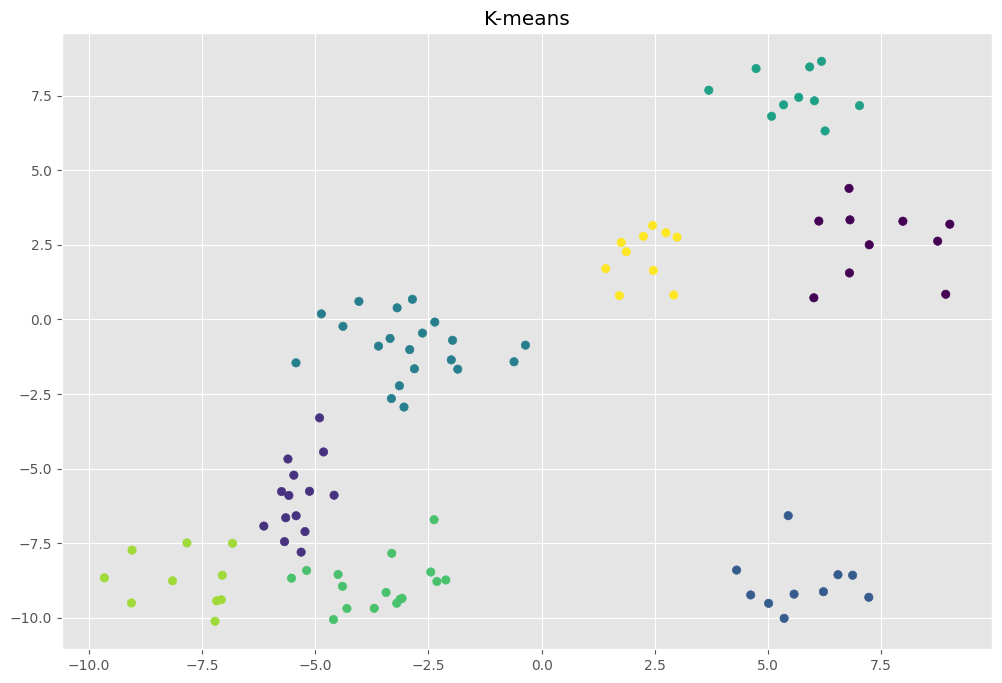

In [229]:
clusters = 8
kmeans_model = KMeans(n_clusters=clusters)
kmeans_model.fit(x)
labels = kmeans_model.labels_
show_result(x, labels, "K-means")

### DBSCAN
Since we already have generated blobs, all we need to do to use DBSCAN method is to guess the `eps` and `min_samples` parameters.
`eps`         -- the maximum distance between two samples for one to be considered as in the neighbourhood of the other
`min_samples` -- the number of samples (or total weight) in a neighbourhood for a point to be considered as a core point

In [230]:
clustering = DBSCAN(eps=1.5, min_samples=2).fit_predict(x)
print(clustering)

[ 0  0  1  1  2  0  1  1  2  2  0  2  0  3  0  0  2  2  0  1  0  1  2  4
  2  2  3  5  2  1  0  0  4  2  2  2  5  1 -1  2  5  2  2  5  2  5  2  0
  3  2  2  2  0  3  2  1  5  5  4  0  3  2  2  3  3  2 -1  2  3  4  5  0
  2  2  4  0  4  1  2  3  2  2  2  2  2  5  4  2  0  2  2  2  0  0  4 -1
  5  2  4  2]


Now we can see the end result below.

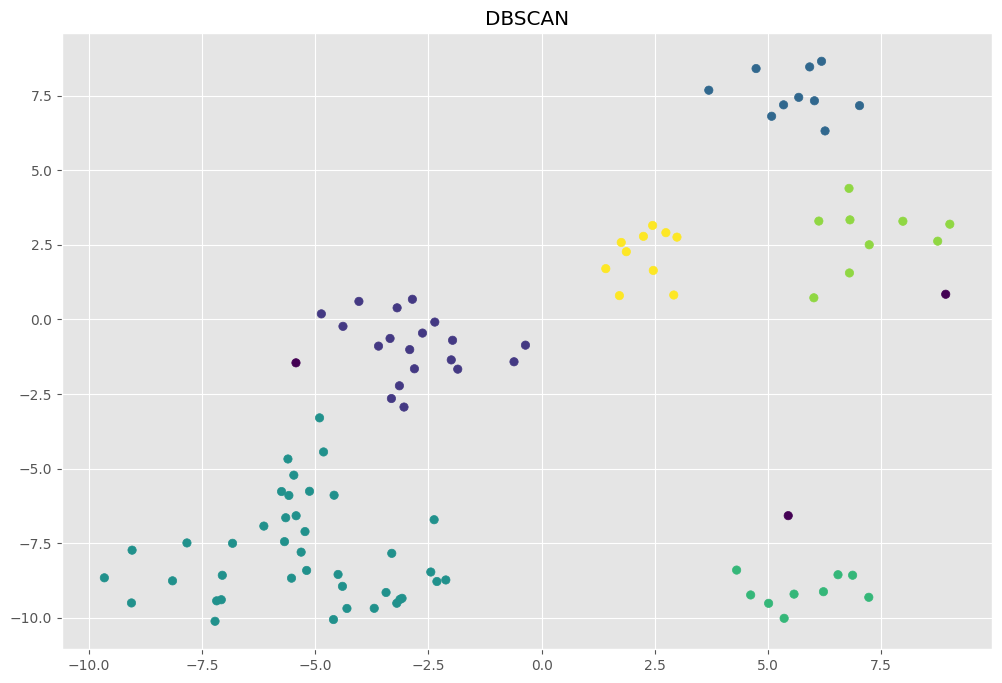

In [231]:
show_result(x, clustering, "DBSCAN")

## Real dataset
We are given the dataset:

In [232]:
df = pd.read_csv("Mall_Customers.xls")
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


We are going to choose `Annual Income` and `Spending Score` as most valuable parameters for our model.

In [233]:
x = df[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[: , :].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Text(0.5, 1.0, 'Elbow point')

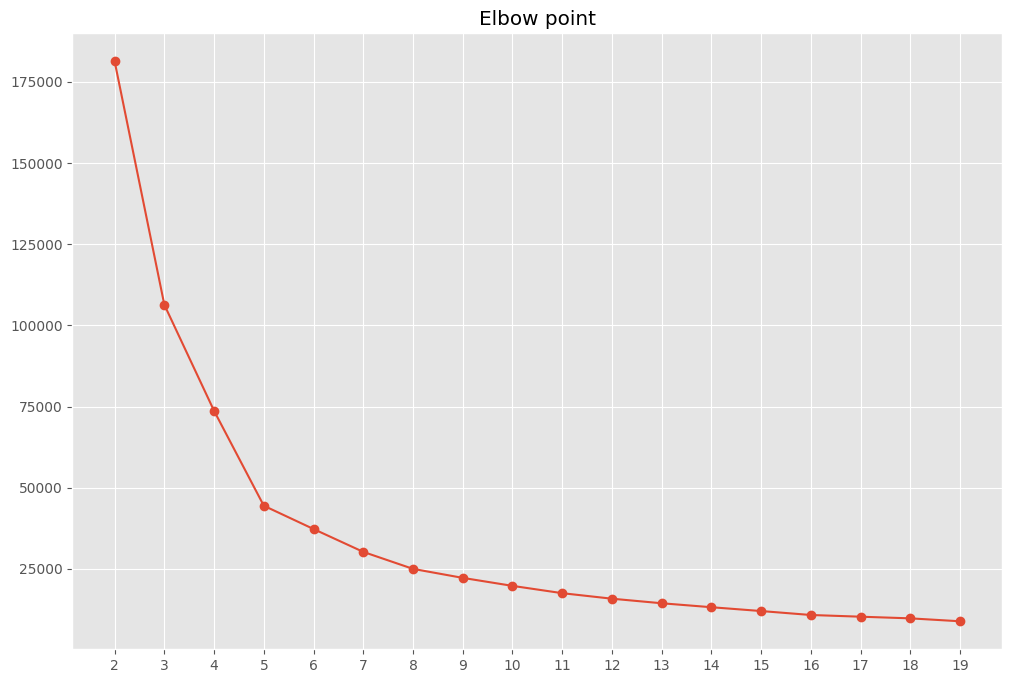

In [234]:
criteria_arr = []
for k in range(2, iterations):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(x)

    criteria = kmeans_model.inertia_
    criteria_arr.append(criteria)

plt.plot(range(2, iterations), criteria_arr, marker="o")
plt.xticks([i for i in range(2, iterations)])
plt.title("Elbow point")

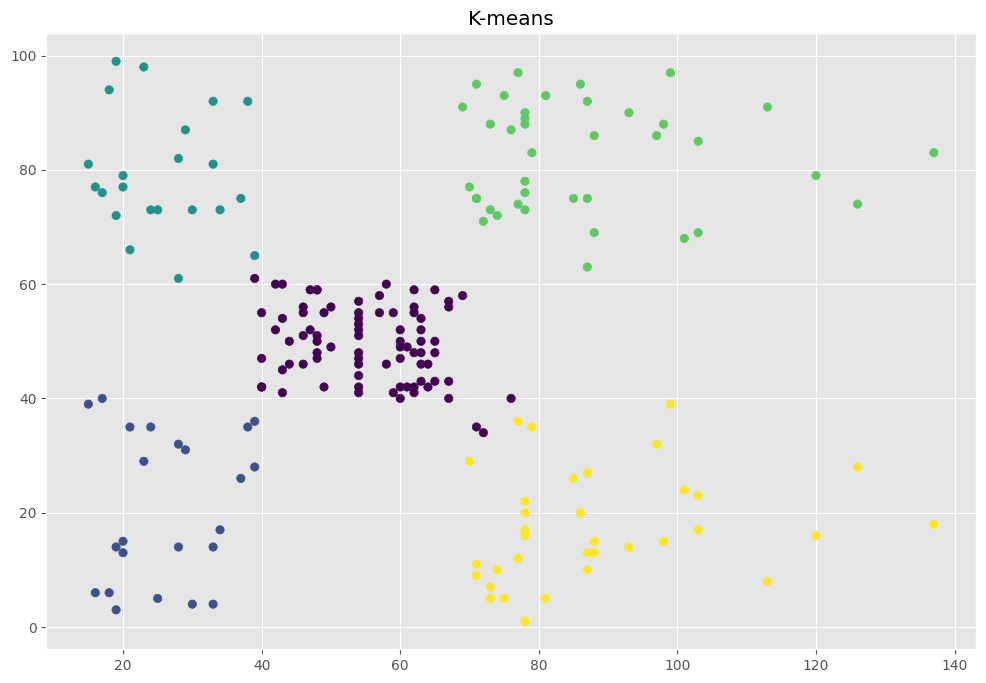

In [235]:
clusters = 5
kmeans_model = KMeans(n_clusters=clusters)
kmeans_model.fit(x)
labels = kmeans_model.labels_
show_result(x, labels, "K-means")

In [252]:
clustering = DBSCAN(eps=5, min_samples=3).fit_predict(x)
print(clustering)

[-1  1  0  1 -1  1  0 -1  0  1  2 -1  2  1  2  1  3 -1 -1 -1  3  4 -1  4
  5 -1  3 -1  3 -1 -1  4 -1 -1  5 -1  5  4 -1  4 -1 -1 -1  6 -1  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  7 -1  8 -1  7  9  8  9  8 -1  8  9  7  9  8  9  8  9  7 10  7
  9  7 10  8  9  7  9  7  9  8  9  7  9  8  9  8 10  7  9  7 -1 -1 -1 -1
 -1 -1 11 -1 11 -1 11 -1 11 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


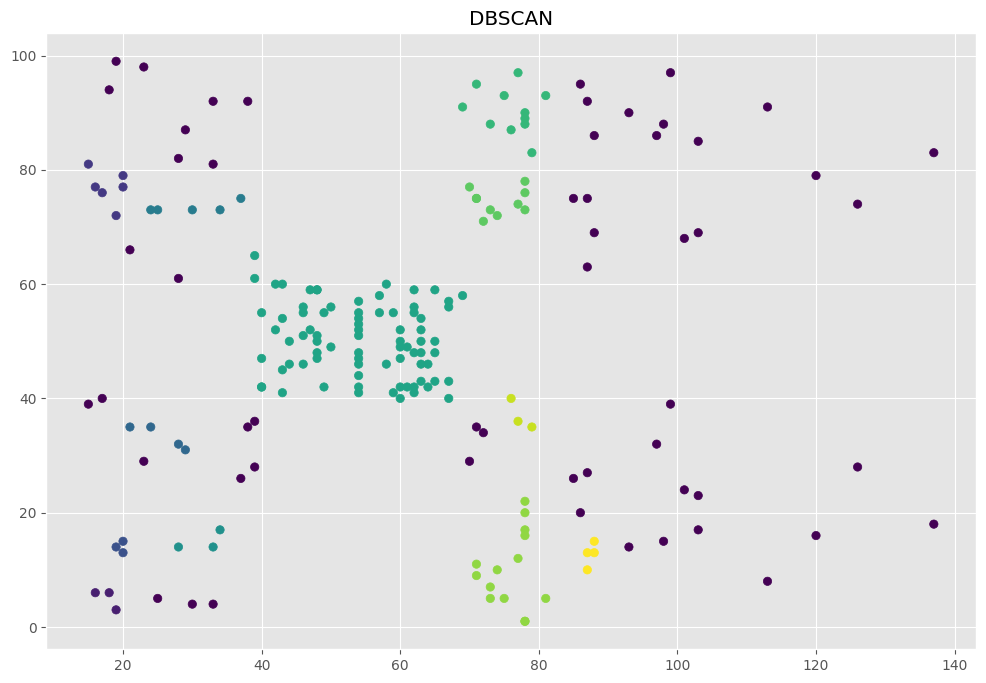

In [253]:
show_result(x, clustering, "DBSCAN")